In [1]:
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/batuguntingkertas.zip

--2020-07-21 12:41:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/batuguntingkertas.zip’

/tmp/batuguntingker 100%[===================>] 307.92M  30.3MB/s    in 11s     

2020-07-21 12:41:29 (27.6 MB/s) - ‘/tmp/batuguntingkertas.zip’ saved [322873683/322873683]



In [2]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/batuguntingkertas.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
os.path.join('/tmp', 'batuguntingkertas')

'/tmp/batuguntingkertas'

In [3]:
pip install split-folders tqdm

In [4]:
# membagi data untuk training 60% dan validasi 40%
import split_folders
split_folders.ratio('/tmp/rockpaperscissors', output="/tmp/batuguntingkertas", seed=1337, ratio=(.6, .4))

Copying files: 2189 files [00:00, 3748.90 files/s]


In [5]:
# melakukan pengecekan direktori
os.listdir('/tmp/batuguntingkertas/train')
os.listdir('/tmp/batuguntingkertas/val')

['rps-cv-images', 'scissors', 'paper', 'rock']

In [6]:
os.listdir('/tmp/batuguntingkertas/train/rps-cv-images')
os.listdir('/tmp/batuguntingkertas/val/rps-cv-images')

['README_rpc-cv-images.txt']

In [7]:
# menghapus direktori yang tidak terkait dengan training model
import shutil
shutil.rmtree('/tmp/batuguntingkertas/train/rps-cv-images')
shutil.rmtree('/tmp/batuguntingkertas/val/rps-cv-images')

In [8]:
rock_dir = os.path.join('/tmp/batuguntingkertas/train/rock')
paper_dir = os.path.join('/tmp/batuguntingkertas/train/paper')
scissors_dir = os.path.join('/tmp/batuguntingkertas/train/scissors')
 
# melihat jumlah data training
print('jumlah data training untuk batu:', len(os.listdir(rock_dir)))
print('jumlah data training untuk paper:', len(os.listdir(paper_dir)))
print('jumlah data training untuk gunting:', len(os.listdir(scissors_dir)))
 
rock_files = os.listdir(rock_dir)
print(rock_files[:5])
paper_files = os.listdir(paper_dir)
print(paper_files[:5])
scissors_files = os.listdir(scissors_dir)
print(scissors_files[:5])

jumlah data training untuk batu: 435
jumlah data training untuk paper: 427
jumlah data training untuk gunting: 450
['1UucZqS3qblvU0cH.png', 'zihL322yBqQvYvhE.png', 'hTzQIKUtmllw7je8.png', 'FopS2RV432i19UVz.png', 'qMWVb6BibNukvVrj.png']
['oqJ2wJHOLMGGxdjF.png', '389udM70tLrMVL5H.png', 'YrEfjld9tYk0b9m9.png', 'tW1oIjn0hlGLToAY.png', 'oTQjuZyEM7y9MlNJ.png']
['Rk0jnjn8GxT17vIT.png', 'xXxXuQZdlW8ebxCN.png', 'Ma48V1PQ0ylc88AU.png', 'VaVPcDb7mPMQ1gHk.png', 'JjS0KakWxwXmg5Wi.png']


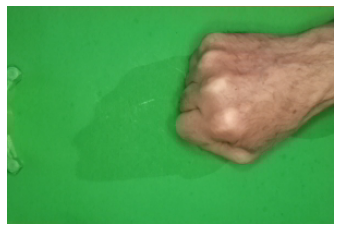

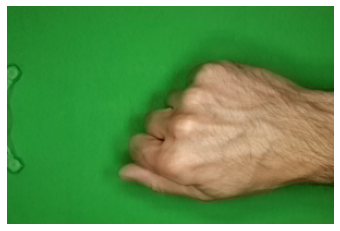

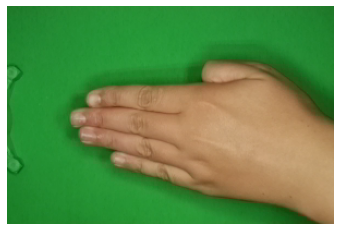

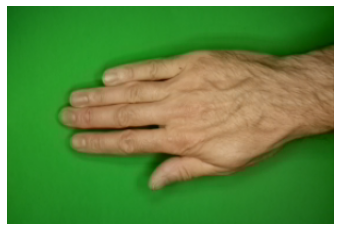

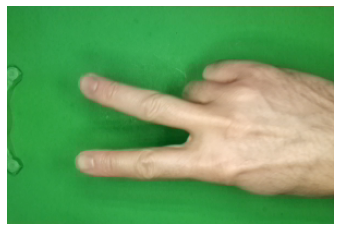

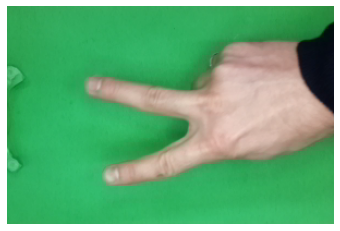

In [9]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
pic_index = 4
 
next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]
 
# menampilkan beberapa data training
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
 
train_dir = "/tmp/batuguntingkertas/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
val_dir = "/tmp/batuguntingkertas/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)
 
train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150
    class_mode='categorical' # menggunakan class_mode categorical dikarenakan klasifikasi 3 kelas 
)
 
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150
    class_mode='categorical' # menggunakan class_mode categorical dikarenakan klasifikasi 3 kelas 
)
 
# menyusun layers neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # output berjumlah 3 sesuai dengan jumlah kelas
])

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.961):
      print("\nReached 96.1% accuracy cancel any further epochs!")
      print(logs)
      self.model.stop_training = True
 
callbacks = myCallback()

In [14]:
# melakukan training model
model.summary()
 
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
 
history = model.fit_generator(train_generator, epochs=20, validation_data = validation_generator, verbose = 1, callbacks=[callbacks])
 
model.save("rps.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

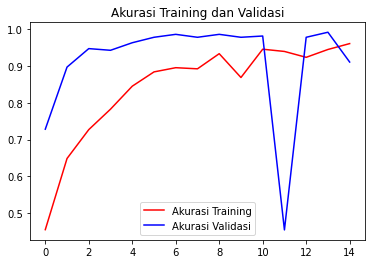

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
# menampilkan grafik akurasi training dan validasi
plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
 
plt.show()

Using TensorFlow backend.


Saving download (2).png to download (2).png
download (2).png
[[1. 0. 0.]]
prediksi model: kertas


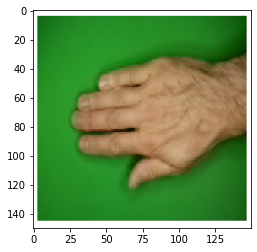

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar yang diupload
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
 
  # menampilkan prediksi dari model
  if classes[0][0] ==1:
    print('prediksi model: kertas')
  elif classes[0][1]==1:
    print('prediksi model: batu')
  elif classes[0][2]==1:
    print('prediksi model: gunting')
  else:
    print('model invalid')